In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
data = pd.read_excel('data_pred.xlsx', header=0)

In [130]:
data.head()

,Performance,Month,Year,Client,Purchases,Redemptions,Net Investment,End AUM
0,Positive,January,2009,AMERIPRISE FINANCIAL INC.,2.996516e+07,-3.003136e+07,-66194.22,1.274382e+09
1,Positive,January,2009,ASH ACCOUNT,0.000000e+00,0.000000e+00,0.00,5.747591e+08
2,Positive,January,2009,CHARLES SCHWAB CORPORATION,1.575096e+08,-1.080519e+08,49457646.06,5.557057e+09
3,Positive,January,2009,FIDELITY INVESTMENTS,1.592842e+08,-1.168878e+08,42396369.10,2.920955e+09
4,Positive,January,2009,GREAT-WEST FINANCIAL,7.473646e+07,-1.247163e+08,-49979820.33,2.868240e+09


In [131]:
data.tail()

,Performance,Month,Year,Client,Purchases,Redemptions,Net Investment,End AUM
1127,Negative,June,2018,GREAT-WEST FINANCIAL,5.395892e+08,-8.127170e+08,-2.731277e+08,4.163255e+09
1128,Negative,June,2018,MASS MUTUAL,4.342893e+08,-5.167224e+08,-8.243304e+07,4.745940e+09
1129,Negative,June,2018,"NATIONWIDE FINANCIAL SERVICES, INC.",2.474587e+08,-4.261898e+08,-1.787312e+08,2.935620e+09
1130,Negative,June,2018,NORTHWESTERN MUTUAL,2.052687e+08,-3.213110e+08,-1.160424e+08,3.241054e+09
1131,Negative,June,2018,WELLS FARGO & COMPANY,6.377461e+08,-6.190123e+08,1.873374e+07,4.437249e+09


In [132]:
data.groupby('Performance').mean()

,Year,Purchases,Redemptions,Net Investment,End AUM
Performance,,,,,
Negative,2015.142857,5.809049e+08,-7.137041e+08,-1.327993e+08,5.925179e+09
Positive,2012.216292,7.318342e+08,-5.543526e+08,1.774816e+08,4.412438e+09


In [133]:
data.groupby('Month').mean()

,Year,Purchases,Redemptions,Net Investment,End AUM
Month,,,,,
April,2013.545455,4.357213e+08,-3.931231e+08,4.259816e+07,5.013280e+09
August,2013.044944,8.621490e+08,-7.734878e+08,8.866116e+07,4.918214e+09
December,2013.111111,1.230270e+09,-1.146331e+09,8.393870e+07,5.070265e+09
February,2013.545455,2.334544e+08,-2.020632e+08,3.139118e+07,4.878086e+09
January,2013.545455,1.389183e+08,-1.168710e+08,2.204730e+07,4.826866e+09
July,2013.044944,7.621033e+08,-6.555555e+08,1.065478e+08,4.987984e+09
June,2013.545455,6.466427e+08,-5.895054e+08,5.713736e+07,5.076285e+09
March,2013.545455,3.263651e+08,-3.079909e+08,1.837412e+07,4.932386e+09
May,2013.545455,5.420261e+08,-5.053008e+08,3.672527e+07,5.011771e+09


Text(0,0.5,'Performance')

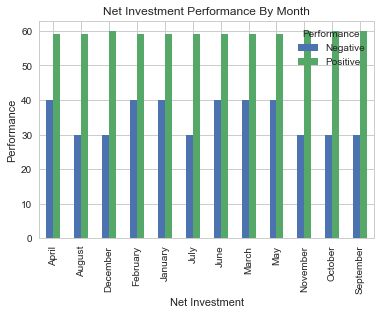

In [134]:
%matplotlib inline
pd.crosstab(data.Month,data.Performance).plot(kind='bar')

plt.title('Net Investment Performance By Month')
plt.xlabel('Net Investment')
plt.ylabel('Performance')


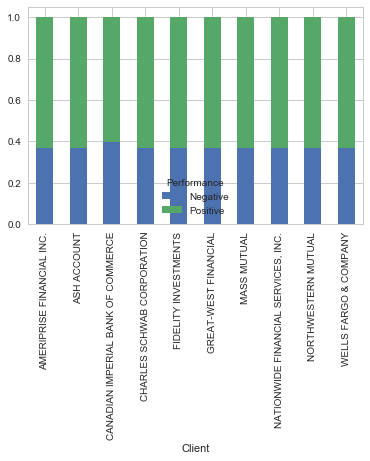

In [86]:
table=pd.crosstab(data.Client,data.Performance)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [87]:
data.head()

,Performance,Month,Year,Client,Purchases,Redemptions,Net Investment,End AUM
0,Positive,January,2009,AMERIPRISE FINANCIAL INC.,2.996516e+07,-3.003136e+07,-66194.22,1.274382e+09
1,Positive,January,2009,ASH ACCOUNT,0.000000e+00,0.000000e+00,0.00,5.747591e+08
2,Positive,January,2009,CHARLES SCHWAB CORPORATION,1.575096e+08,-1.080519e+08,49457646.06,5.557057e+09
3,Positive,January,2009,FIDELITY INVESTMENTS,1.592842e+08,-1.168878e+08,42396369.10,2.920955e+09
4,Positive,January,2009,GREAT-WEST FINANCIAL,7.473646e+07,-1.247163e+08,-49979820.33,2.868240e+09


In [88]:
from sklearn.utils import shuffle

df = shuffle(data, random_state=0)
df.head()

,Performance,Month,Year,Client,Purchases,Redemptions,Net Investment,End AUM
14,Positive,February,2009,MASS MUTUAL,1.002455e+09,-5.901089e+08,4.123465e+08,8.667740e+08
957,Negative,January,2017,GREAT-WEST FINANCIAL,1.616895e+08,-1.055366e+08,5.615290e+07,4.126943e+09
495,Negative,March,2013,CHARLES SCHWAB CORPORATION,7.416295e+08,-7.293574e+08,1.227206e+07,1.180110e+10
608,Negative,February,2014,MASS MUTUAL,2.026266e+08,-2.131927e+08,-1.056607e+07,2.424949e+09
529,Negative,June,2013,"NATIONWIDE FINANCIAL SERVICES, INC.",2.534417e+08,-4.385818e+08,-1.851401e+08,2.839302e+09


In [89]:
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()

df['Performance'] = le_dep.fit_transform(df['Performance'])
df.head()

,Performance,Month,Year,Client,Purchases,Redemptions,Net Investment,End AUM
14,1,February,2009,MASS MUTUAL,1.002455e+09,-5.901089e+08,4.123465e+08,8.667740e+08
957,0,January,2017,GREAT-WEST FINANCIAL,1.616895e+08,-1.055366e+08,5.615290e+07,4.126943e+09
495,0,March,2013,CHARLES SCHWAB CORPORATION,7.416295e+08,-7.293574e+08,1.227206e+07,1.180110e+10
608,0,February,2014,MASS MUTUAL,2.026266e+08,-2.131927e+08,-1.056607e+07,2.424949e+09
529,0,June,2013,"NATIONWIDE FINANCIAL SERVICES, INC.",2.534417e+08,-4.385818e+08,-1.851401e+08,2.839302e+09


In [90]:
# perform data transformation. Creates dummies of any categorical feature
for col in df.columns[1:]:
    attName = col
    dType = df[col].dtype
    missing = pd.isnull(df[col]).any()
    uniqueCount = len(df[attName].value_counts(normalize=False))
    # discretize (create dummies)
    if dType == object:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        del df[attName]
        
df.shape
df.describe()

,Performance,Year,Purchases,Redemptions,Net Investment,End AUM,Month_April,Month_August,Month_December,Month_February,...,Client_AMERIPRISE FINANCIAL INC.,Client_ASH ACCOUNT,Client_CANADIAN IMPERIAL BANK OF COMMERCE,Client_CHARLES SCHWAB CORPORATION,Client_FIDELITY INVESTMENTS,Client_GREAT-WEST FINANCIAL,Client_MASS MUTUAL,"Client_NATIONWIDE FINANCIAL SERVICES, INC.",Client_NORTHWESTERN MUTUAL,Client_WELLS FARGO & COMPANY
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,0.628975,2013.302120,6.758357e+08,-6.134759e+08,6.235974e+07,4.973703e+09,0.087456,0.078622,0.079505,0.087456,...,0.100707,0.100707,0.093640,0.100707,0.100707,0.100707,0.100707,0.100707,0.100707,0.100707
std,0.483293,2.744446,6.685646e+08,6.266969e+08,5.054662e+08,3.193249e+09,0.282627,0.269267,0.270645,0.282627,...,0.301073,0.301073,0.291455,0.301073,0.301073,0.301073,0.301073,0.301073,0.301073,0.301073
min,0.000000,2009.000000,0.000000e+00,-3.710606e+09,-1.742728e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2011.000000,1.987351e+08,-8.792348e+08,-1.123984e+08,2.762111e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2013.000000,4.472616e+08,-4.351950e+08,0.000000e+00,3.794480e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2016.000000,9.997254e+08,-1.376288e+08,1.440988e+08,7.348112e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2018.000000,4.106022e+09,0.000000e+00,3.122466e+09,1.313582e+10,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.2, random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(905, 27)
(227, 27)
(905,)
(227,)


In [92]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.477705
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Performance   No. Observations:                 1132
Model:                          Logit   Df Residuals:                     1107
Method:                           MLE   Df Model:                           24
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.2757
Time:                        20:10:09   Log-Likelihood:                -540.76
converged:                      False   LL-Null:                       -746.55
                                        LLR p-value:                 3.136e-72
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Year                                          -0.3464      0.045     -7.708     

C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False False  True  True  True False
  True False False False False  True  True False False False  True  True
  True  True False]
[ 1  1  1  1  1  4  2 11  1  1  1 10  1  7  9  6  5  1  1 13  8 12  1  1
  1  1  3]


In [125]:
df.columns.values

array(['Performance', 'Year', 'Purchases', 'Redemptions',
       'Net Investment', 'End AUM', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September',
       'Client_AMERIPRISE FINANCIAL INC.', 'Client_ASH ACCOUNT',
       'Client_CANADIAN IMPERIAL BANK OF COMMERCE',
       'Client_CHARLES SCHWAB CORPORATION', 'Client_FIDELITY INVESTMENTS',
       'Client_GREAT-WEST FINANCIAL', 'Client_MASS MUTUAL',
       'Client_NATIONWIDE FINANCIAL SERVICES, INC.',
       'Client_NORTHWESTERN MUTUAL', 'Client_WELLS FARGO & COMPANY'],
      dtype=object)